<a href="https://www.kaggle.com/code/mikedelong/eda-with-lineplots-corrrelations-daily-changes?scriptVersionId=139223800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='../input/us-treasury-yields-daily/us_treasury_yields_daily.csv', parse_dates=[0])
df.head()

,date,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
0,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1,1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
2,1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
3,1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
4,1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


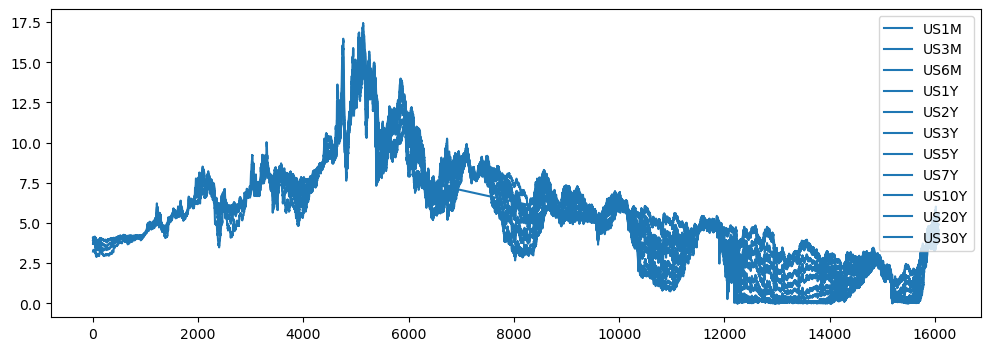

In [2]:
from matplotlib.pyplot import subplots
from seaborn import lineplot

fig, ax = subplots(figsize=(12, 4))
for column in df.columns[1:]:
    lineplot(data=df[['date', column]], ax=ax)

Those look really highly correlated; how highly correlated are they?

<Axes: >

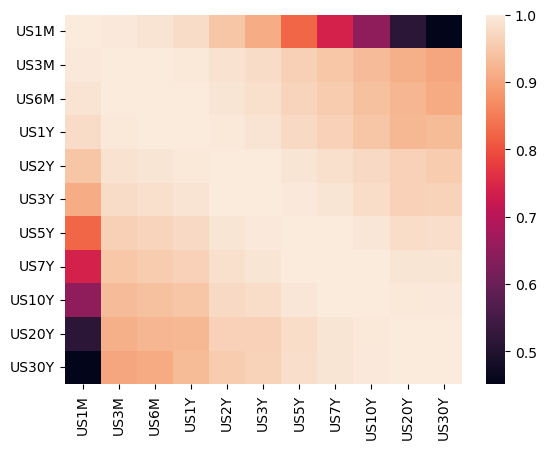

In [3]:
from seaborn import heatmap
heatmap(data=df.drop(columns=['date']).corr(), )

<Axes: ylabel='Frequency'>

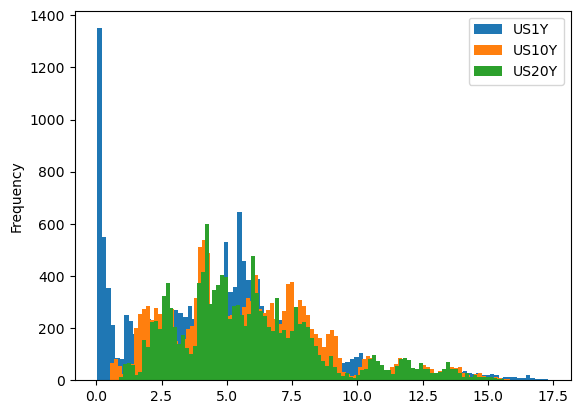

In [4]:
df['US1Y'].plot.hist(bins=100, legend=True)
df['US10Y'].plot.hist(bins=100, legend=True)
df['US20Y'].plot.hist(bins=100, legend=True)

The distributions have similar shapes, except ony the 1Y rate was ever zero.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


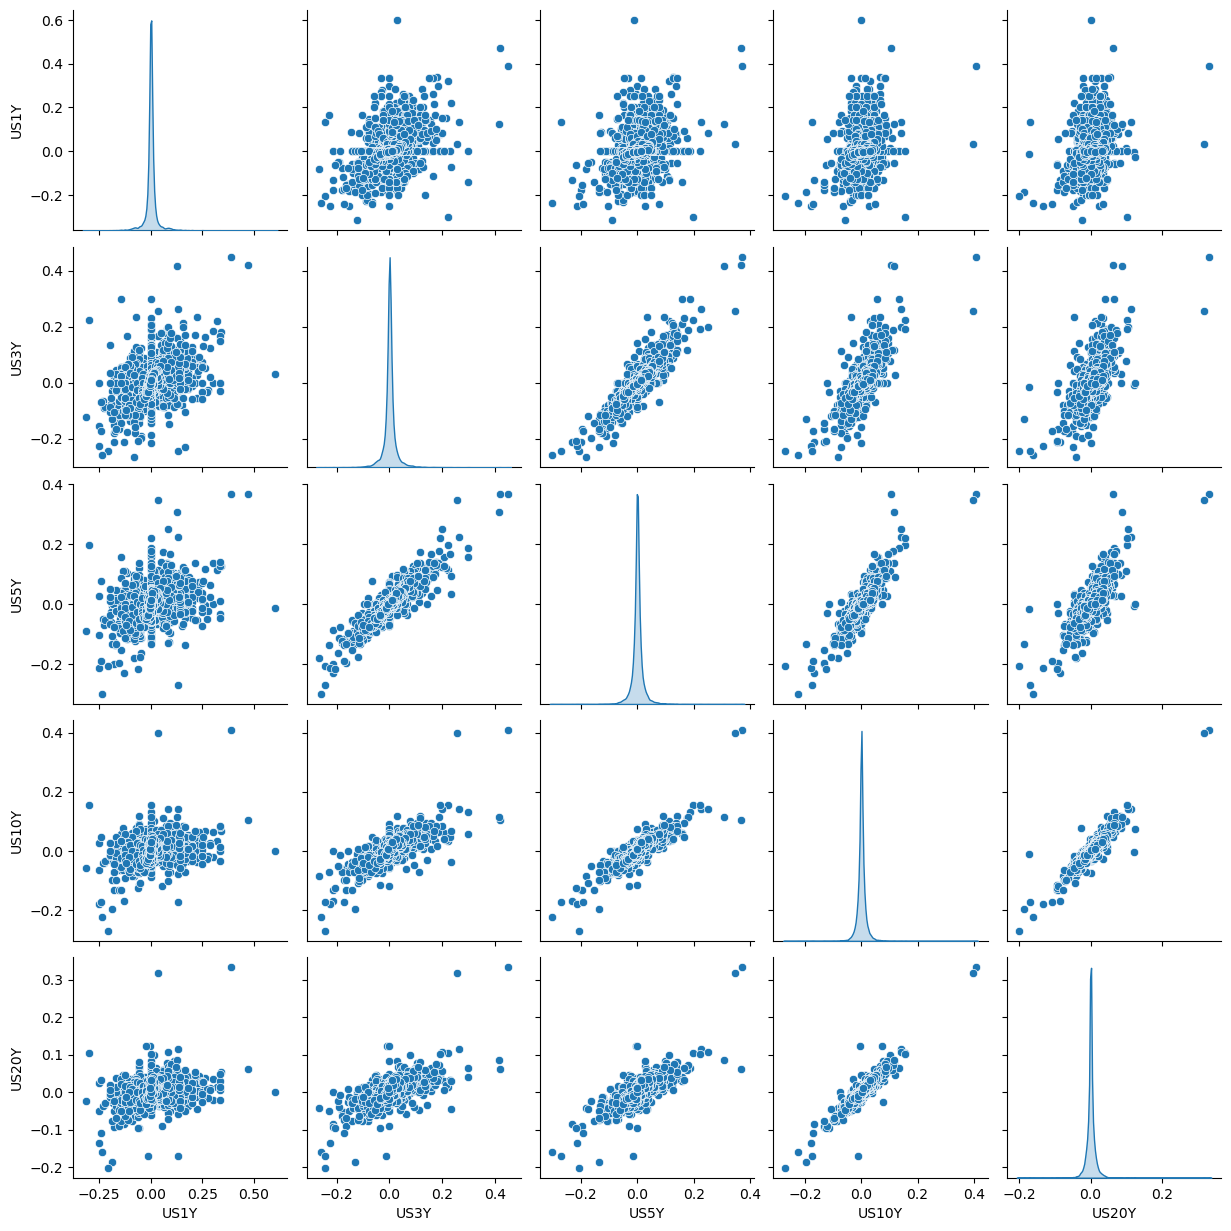

In [5]:
# if we just look at the rates for which we have a full series we get a graph that's a nice size and we don't have to deal with nulls.
from seaborn import pairplot
pairplot(data=df[['US1Y', 'US3Y', 'US5Y', 'US10Y', 'US20Y']].pct_change(1), diag_kind='kde')

The daily changes look very Gaussian but the covariances of the daily changes not so much.